In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

2. Write your own code for a function to do a linear interpolation from an input set of datapoints
with (𝑥, 𝑦) coordinates, to return the value of 𝑦 at any requested value of 𝑥 that is within the
domain of the input dataset. Extrapolation is when you try to predict values of 𝑦 at values of
𝑥 that fall outside the domain of your dataset. Consider whether or when you would think
that's ok to do. Adopt some assumption and write your code to deal with extrapolation (e.g.,
you could forbid users from doing this; you could assume values continue with a constant
slope from the last points; you could assume a constant value from the last points; or you
could make other assumptions).

In [2]:
#function for linear interpolation
def linear_interp(xi,yi,xi1,yi1,x):
    '''
    xi, yi = Initial given points
    xi1, yi1 = Next set of given points
    x = point to perform interp
    '''
    #Check to see if interpolating point is inbetween the two points
    if not (min(xi, xi1) <= x <= max(xi, xi1)):
        raise ValueError("x is outside interpolation interval.")

    #Check that there is a place to interpolate from and to
    if xi1 == xi:
        raise ValueError("xi and xi1 cannot be equal.")

    #Draw a line between two points 
    ai = (yi1-yi)/(xi1-xi) #Slope
    g = ai*(x-xi)+yi
    
    return g 

    #extrapolation piece???
    

In [3]:
test = linear_interp(-1,-3,0,-1,0)
test

-1.0

2a. Consider the dataset in the file HW01_data.txt (provided separately). You may
input these values in your code by hand or write a routine to read in this file. Use your
code to interpolate the data to at least 10 times higher resolution (i.e., 10 times more
points than the dataset, within the same domain). Plot the dataset, and overplot your own
linear-interpolation points. Make a distinction between the original points and your
interpolated points.

In [4]:
data = np.genfromtxt("HW01_data.txt",skip_header=1) #read txt file

#much easier to use indexing
x_vals = data[:, 0] 
y_vals = data[:, 1] 


#x_vals = np.array() #empty array for x-vals
#y_vals = np.array() #empty array for y-vals

#loop to append x, y-vals from data
# for i, j in data:
#     x_vals.append(i) 
#     y_vals.append(j) 

In [7]:
x_interp = np.linspace(x_vals.min(), x_vals.max(), 10*len(x_vals)) #range of x's to interpolate (10x resolution) 
y_interp = [] #empty list for results of interpolated points

#actually looping through the data to apply interpolation function
for x in x_interp: #want to go through all the x's that I want to interpolate at 
    for i in range(len(x_vals)-1): #but the loop with actual interpolation only needs to be in the range of the x_vals from txt file
        if x_vals[i] <= x <= x_vals[i+1]: #domain check again, inherently prevents against extrapolation 
            #x interval
            xi  = x_vals[i] 
            xi1 = x_vals[i+1]
            #y interval
            yi  = y_vals[i]
            yi1 = y_vals[i+1]
            print(f"Interpolating between points {float(xi),float(xi1)} at x = {x}") #Output to ensure that's what I want 
            
            y_new = linear_interp(xi, yi, xi1, yi1, x) #Apply function
            y_interp.append(y_new) #Add interpolated values into the empty list above

            break #once found, move on to the next interval

Interpolating between points (-1.0, 0.0) at x = -1.0
Interpolating between points (-1.0, 0.0) at x = -0.9090909090909091
Interpolating between points (-1.0, 0.0) at x = -0.8181818181818181
Interpolating between points (-1.0, 0.0) at x = -0.7272727272727273
Interpolating between points (-1.0, 0.0) at x = -0.6363636363636364
Interpolating between points (-1.0, 0.0) at x = -0.5454545454545454
Interpolating between points (-1.0, 0.0) at x = -0.4545454545454546
Interpolating between points (-1.0, 0.0) at x = -0.36363636363636365
Interpolating between points (-1.0, 0.0) at x = -0.2727272727272727
Interpolating between points (-1.0, 0.0) at x = -0.18181818181818177
Interpolating between points (-1.0, 0.0) at x = -0.09090909090909083
Interpolating between points (-1.0, 0.0) at x = 0.0
Interpolating between points (0.0, 1.0) at x = 0.09090909090909083
Interpolating between points (0.0, 1.0) at x = 0.18181818181818188
Interpolating between points (0.0, 1.0) at x = 0.2727272727272727
Interpolatin

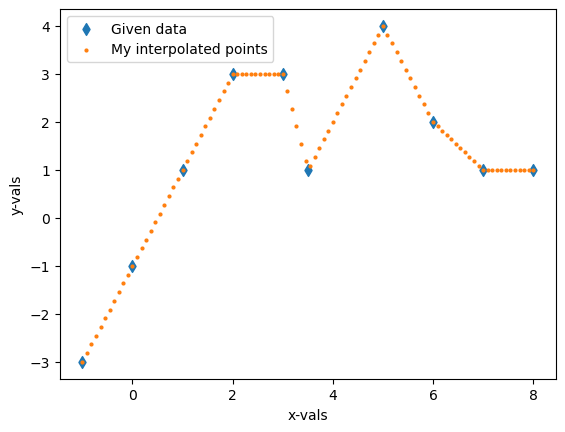

In [12]:
plt.scatter(x_vals,y_vals,marker="d",label="Given data")
plt.scatter(x_interp,y_interp,label="My interpolated points",s=4) #These are individual points 
plt.xlabel("x-vals")
plt.ylabel("y-vals")
plt.legend()

(b) [1 pts] Use an off-the-shelf code for doing a cubic spline interpolation of the data (e.g.,
using a library in Python or MATLAB). Plot the cubic spline interpolation on top of the
dataset, again making a distinction between the dataset and the interpolation (here you
can draw the spline as a continuous line, if you want).

In [18]:
cs = CubicSpline(x_vals, y_vals) #scipy cubic spline for given data
xs = np.linspace(x_vals.min(), x_vals.max()) #x-vals for interpolation

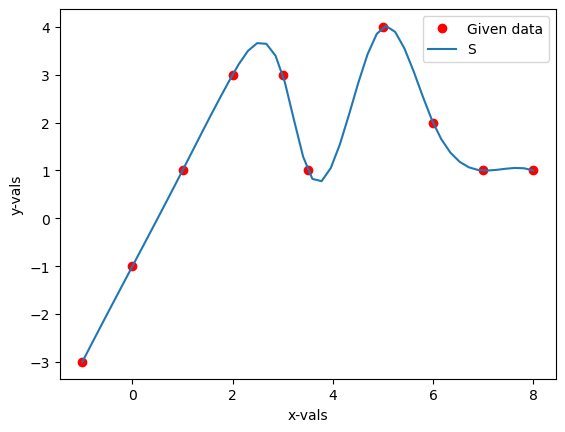

In [20]:
plt.plot(x_vals,y_vals,"ro",label="Given data")
plt.plot(xs, cs(xs), label="S")
plt.xlabel("x-vals")
plt.ylabel("y-vals")
plt.legend()

Consider the following function
$$y = \sin{\frac{\pi}{2}x}+\frac{x}{2}$$
Create a dataset that samples this function at every integer from 0 to 10.

In [52]:
#Given function
def func3(x):
    return np.sin((np.pi/2)*x)+(x/2)

In [53]:
nums = np.array([0,1,2,3,4,5,6,7,8,9,10])
func_nums = func3(nums)
func_nums

array([0. , 1.5, 1. , 0.5, 2. , 3.5, 3. , 2.5, 4. , 5.5, 5. ])

(a) Plot your dataset, and overplot the data interpolated to 10 times higher resolution,
using both your linear code and an off-the-shelf cubic spline.

In [142]:
cs = CubicSpline(nums, func_nums) #scipy cubic spline for given data
xs = np.arange(0, 10+0.001, 0.001) #x-vals for plotting purposes only

Text(0, 0.5, 'y-vals')

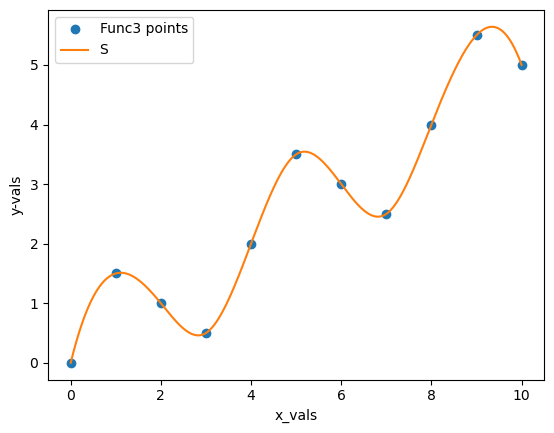

In [143]:
plt.plot(nums,func_nums,"o",label="Func3 points")
plt.plot(xs, cs(xs), label="S")
#plt.plot(,label = "Linear S")
plt.legend()
plt.xlabel("x_vals")
plt.ylabel("y-vals")

(b) Plot the relative error between your interpolated values (both linear and cubic
spline on the same plot) and the true function, in the domain 𝑥 = [0, 10]. The relative
error is the difference between interpolated values and the true value from the function,
divided by the true value. Comment on what the plot shows.